2024-04-19 15:09:03.629 | INFO     | gdsfactory.klive:show:56 - Message from klive: {"version": "0.2.2", "type": "open", "file": "/tmp/gdsfactory/hello.gds"}


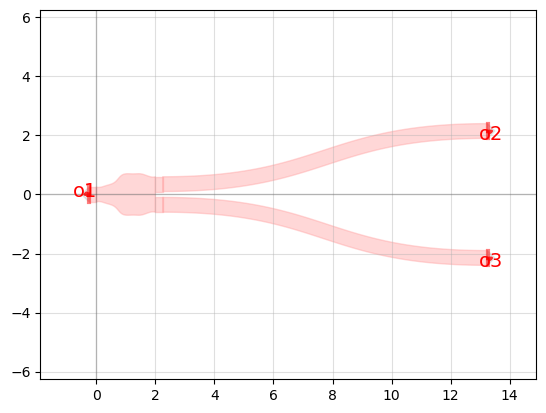

In [2]:
import gdsfactory as gf
import gplugins.gmeep as gm
import gplugins

c = gf.components.mmi1x2_with_sbend(with_sbend=True, cross_section="xs_sc")
c.plot()

core_material = gplugins.get_effective_indices(
    core_material=3.4777,
    clad_materialding=1.444,
    nsubstrate=1.444,
    thickness=0.22,
    wavelength=1.55,
    polarization="te",
)[0]


In [ ]:
sp = gm.write_sparameters_meep(c, run=False)

In [17]:
sp = gm.write_sparameters_meep(
    c, 
    resolution= 20, 
    is_3d=False,
    material_name_to_meep = dict(si=core_material),
    filepath="data/y_junction.npz"
)

2024-04-13 10:55:27.850 | INFO     | gplugins.gmeep.write_sparameters_meep:write_sparameters_meep:396 - Simulation loaded from PosixPath('data/y_junction.npz')


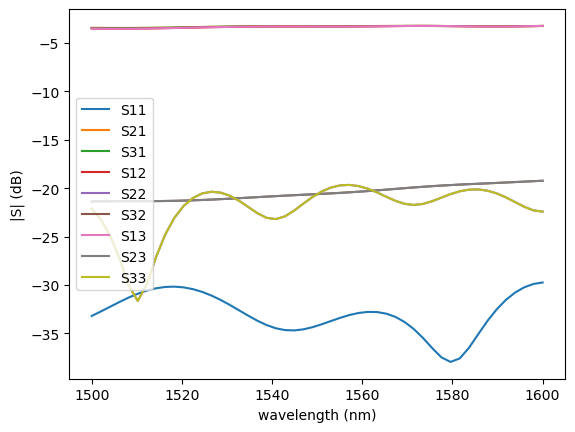

In [18]:
gplugins.plot.plot_sparameters(sp)

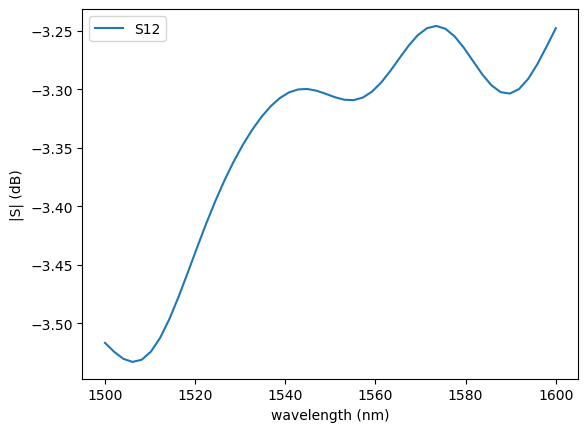

In [30]:
gplugins.plot.plot_sparameters(sp, keys=("o1@0,o2@0",))

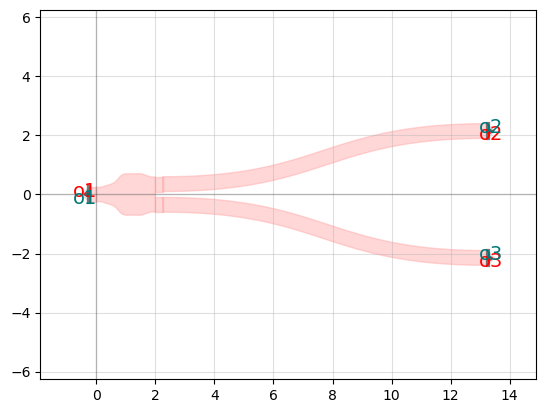

In [31]:
from gplugins.gmeep.get_simulation import get_simulation

component = gf.add_padding_container(
    c,
    default=0,
    top=3.2,
    bottom=3.2,
)

component.plot()

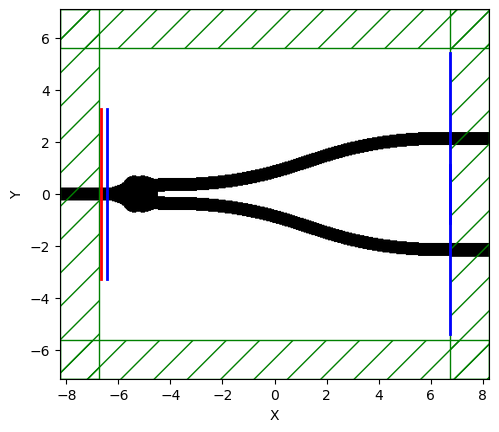

In [33]:
import matplotlib.pyplot as plt

sim_dict = get_simulation(
    component,
    is_3d=False,
    port_source_offset=-0.1,
    extend_ports_length=3,
    continuous_source=True,
    force_complex_fields=True,
)
sim = sim_dict["sim"]
sim.plot2D()
plt.show()

In [34]:
sim.init_sim()
sim.solve_cw(1e-6, 10000, 10)

2024-04-13 14:24:33.972 | WARNING  | gdsfactory.config:showwarning:296 - Casting complex values to real discards the imaginary part
2024-04-13 14:24:34.031 | WARNING  | gdsfactory.config:showwarning:296 - Casting complex values to real discards the imaginary part


/home/doan/miniconda3/envs/mp/lib/python3.11/site-packages/meep/__init__.py:4436: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep.create_structure(cell_size, dft_data_list_, pml_1d_vols_, pml_2d_vols_, pml_3d_vols_, absorber_vols_, gv, br, sym, num_chunks, Courant, use_anisotropic_averaging, tol, maxeval, gobj_list, center, _ensure_periodicity, _default_material, alist, extra_materials, split_chunks_evenly, set_materials, existing_s, output_chunk_costs, my_bp)
/home/doan/miniconda3/envs/mp/lib/python3.11/site-packages/meep/__init__.py:4439: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._set_materials(s, cell_size, gv, use_anisotropic_averaging, tol, maxeval, gobj_list, center, _ensure_periodicity, _default_material, alist, extra_materials, split_chunks_evenly, set_materials, existing_geps, output_chunk_costs, my_bp)


True

In [35]:
import meep as mp
sx = sim.cell_size.x
sy = sim.cell_size.y
dpml = sim.boundary_layers[0].thickness
nonpml_vol = mp.Volume(mp.Vector3(), size=mp.Vector3(sx - 2 * dpml, sy - 2 * dpml))
ez_dat = sim.get_array(vol=nonpml_vol, component=mp.Ez)

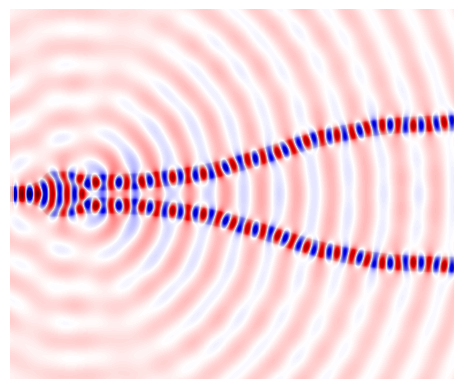

In [49]:
import numpy as np

eps_data = sim.get_array(vol=nonpml_vol, component=mp.Dielectric)
ez_data = np.real(ez_dat)

plt.figure()
plt.imshow(eps_data.transpose(), interpolation="spline36", cmap="binary")
plt.imshow(ez_data.transpose(), interpolation="spline36", cmap="seismic", alpha=0.9)
plt.axis("off")
plt.show()